# Network Analytics Homework 3

### Group G: Joanna Andari, Karim Awad, Jiye Ren, Nirbhay Sharma, Qiuyue Zhang, Xiaoyan Zhou

### TABLE OF CONTENTS

**1. [QUESTION 1 - Detecting communities in two networks](#QUESTION-1)**                              
**1(i). [QUESTION 1 - Zachary Karate Club](Q1---PART-i)**                          
**1(ii). [QUESTION 1 - Who Talks to Whom](Q1---PART-ii)**                   
                     
**2. [QUESTION 2 - Bass Model](#QUESTION-2)**                       
                       
**3. [QUESTION 3 - recreate the findings from a network diffusion econometrics study on microfinance](#QUESTION-3)**                              

### QUESTION 1   
##### (15 + 5 points) 
**The exercise is on detecting communities in two networks**                        
                        
##### Q1 - PART i
**The small Zachary Karate Club network with known community ground-truth**

**ANSWER)**             
For the Zachary Karate Club, we analyse the network by building several graph layouts and then use the Louvain Community package. As the label of the nodes is different from the original label, we use the original data set in order to assess the community detection performace. The data we use is downloaded from http://math.bu.edu/people/kolaczyk/datasets.html.


In [1]:
from pandas import Series, DataFrame
import pandas as pd
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import community
from networkx.algorithms.community import centrality
import itertools

** Create graph **

In [2]:
club = r'./zachary.txt'
G = nx.read_weighted_edgelist(club, nodetype = str)

** Network overview - spring layout **

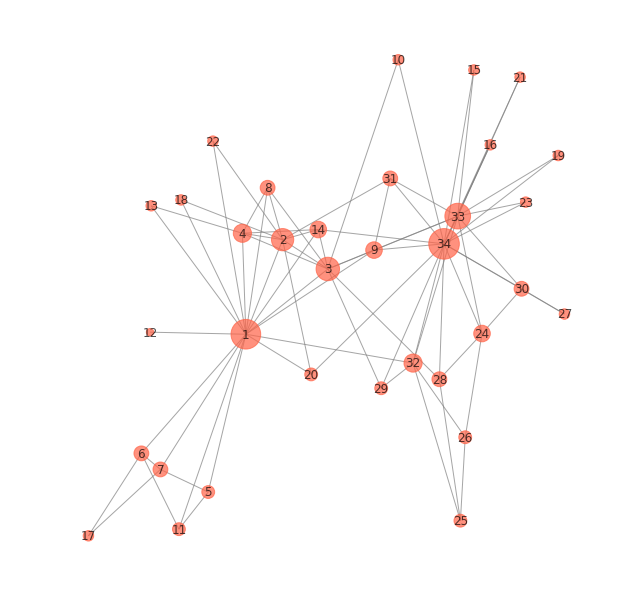

In [3]:
labels_dict = dict()
for i in list(G.nodes()):
    labels_dict[i] = str(int(i))
    
plt.figure(figsize=(8,8))
nx.draw(G, 
        pos = nx.spring_layout(G, k = 0.25),
        node_size = list(55 * i for i in dict(nx.degree(G, G.nodes())).values()),
        node_color = 'tomato',
        edge_color = 'grey',
        alpha = 0.7,
        with_labels = True,
        labels = labels_dict)
plt.show()

** Network overview - shell layout **

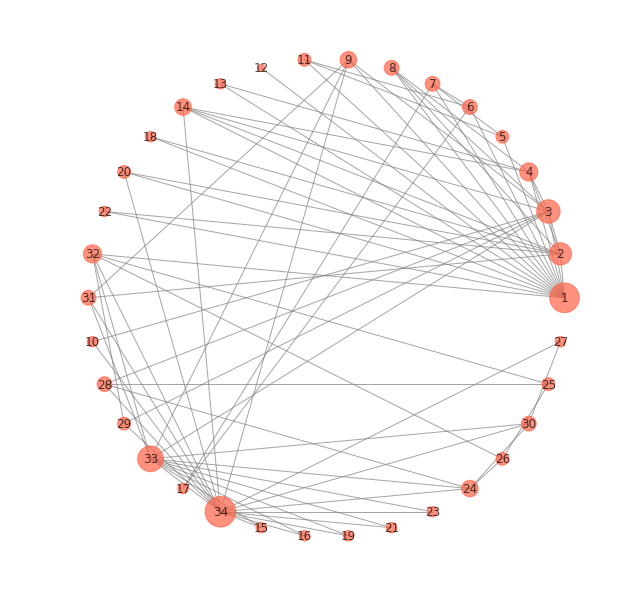

In [4]:
# Shell layout
plt.figure(figsize=(8,8))
nx.draw(G, 
        pos = nx.shell_layout(G),
        node_size = list(55 * i for i in dict(nx.degree(G, G.nodes())).values()),
        node_color = 'tomato',
        edge_color = 'grey',
        alpha = 0.7,
        with_labels = True,
        labels = labels_dict)
plt.show()

From the above graph, the karate club network seems to have several big hubs (1, 34, 33, etc) and lots of smaller nodes which have few connections with other club members.

** Find a partition that maximises modularity **

In [5]:
part = community.best_partition(G)
mod = community.modularity(part, G)
print("Louvain - modularity: ", mod)

Louvain - modularity:  0.44490358126721763


** Partition at certain level **

In [6]:
den = community.generate_dendrogram(G)
for level in range(len(den)):
   print("partition at level", level, " is ", community.partition_at_level(den, level), "\n")
print("The least partition gives 4 communities, and the second least gives 7 communities.")

partition at level 0  is  {'1': 0, '2': 0, '3': 0, '4': 0, '5': 1, '6': 2, '7': 2, '8': 0, '9': 3, '11': 1, '12': 0, '13': 0, '14': 0, '18': 0, '20': 0, '22': 0, '32': 4, '31': 3, '10': 3, '28': 5, '29': 4, '33': 3, '17': 2, '34': 3, '15': 3, '16': 3, '19': 3, '21': 3, '23': 3, '24': 5, '26': 4, '30': 6, '25': 4, '27': 6} 

partition at level 1  is  {'1': 0, '2': 0, '3': 0, '4': 0, '5': 1, '6': 1, '7': 1, '8': 0, '9': 2, '11': 1, '12': 0, '13': 0, '14': 0, '18': 0, '20': 0, '22': 0, '32': 3, '31': 2, '10': 2, '28': 3, '29': 3, '33': 2, '17': 1, '34': 2, '15': 2, '16': 2, '19': 2, '21': 2, '23': 2, '24': 3, '26': 3, '30': 2, '25': 3, '27': 2} 

The least partition gives 4 communities, and the second least gives 7 communities.


We combine the first two detected communities as one group, and the last two detected communities as another group.

Instructor group:
Correctly classified nodes are 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22; nodes that belong to the instructor group but are missed is 9.

Owner group:
Correctly classified nodes are 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34; nodes that are wrongly included by the algorithm is 9. 

The overall accurancy is $1/34 \approx 97.06\%$.

** Plot using networkx where different community households have different colors. **

* Level 0

In [7]:
lv0_dict = community.partition_at_level(den, 0)
lv0_part_dict = dict()
for i in list(set(lv0_dict.values())):
    lv0_part_dict[i] = list()
    for j in list(lv0_dict.keys()):
        if lv0_dict[j] == i:
            lv0_part_dict[i].append(j)
for i in list(lv0_part_dict.keys()):
    print("The " + str(int(i)+1) + "th community contains " + str(len(lv0_part_dict[i])) + " nodes: " + str(lv0_part_dict[i]) + ". \n")

The 1th community contains 11 nodes: ['1', '2', '3', '4', '8', '12', '13', '14', '18', '20', '22']. 

The 2th community contains 2 nodes: ['5', '11']. 

The 3th community contains 3 nodes: ['6', '7', '17']. 

The 4th community contains 10 nodes: ['9', '31', '10', '33', '34', '15', '16', '19', '21', '23']. 

The 5th community contains 4 nodes: ['32', '29', '26', '25']. 

The 6th community contains 2 nodes: ['28', '24']. 

The 7th community contains 2 nodes: ['30', '27']. 



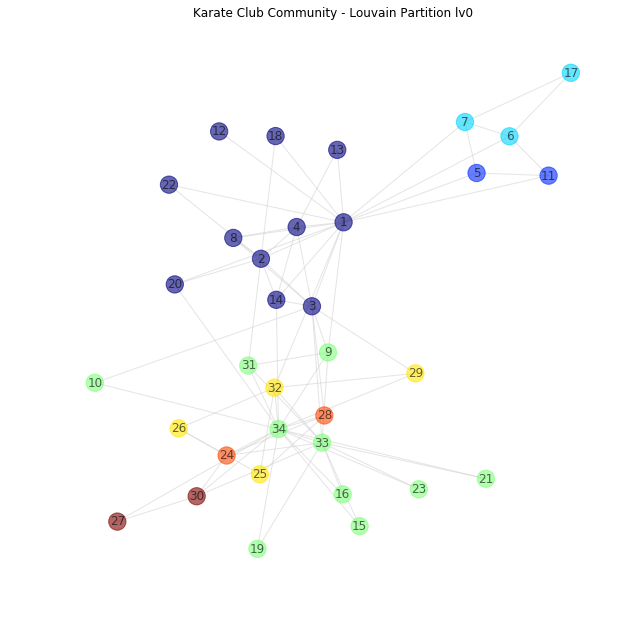

In [8]:
values = [lv0_dict[node] for node in G.nodes()]
pos = nx.spring_layout(G)
plt.figure(figsize=(8,8))
nx.draw(G, 
        pos, 
        cmap = plt.get_cmap('jet'), 
        node_color = values, 
        node_size = 300, 
        alpha = 0.6,
        edge_color = 'lightgray',
        with_labels = True)
plt.title('Karate Club Community - Louvain Partition lv0')
plt.show()

There are too many splits (7 in total) in this level which makes it hard to compare. Thus we use level 1's split (4 in total) to draw the graph and compare with the community split in the real life.

* Level 1

In [9]:
lv1_dict = community.partition_at_level(den, 1)
lv1_part_dict = dict()
for i in list(set(lv1_dict.values())):
    lv1_part_dict[i] = list()
    for j in list(lv1_dict.keys()):
        if lv1_dict[j] == i:
            lv1_part_dict[i].append(j)

for i in list(lv1_part_dict.keys()):
    print("The " + str(int(i)+1) + "th community contains " + str(len(lv1_part_dict[i])) + " nodes: " + str(lv1_part_dict[i]) + ". \n")

The 1th community contains 11 nodes: ['1', '2', '3', '4', '8', '12', '13', '14', '18', '20', '22']. 

The 2th community contains 5 nodes: ['5', '6', '7', '11', '17']. 

The 3th community contains 12 nodes: ['9', '31', '10', '33', '34', '15', '16', '19', '21', '23', '30', '27']. 

The 4th community contains 6 nodes: ['32', '28', '29', '24', '26', '25']. 



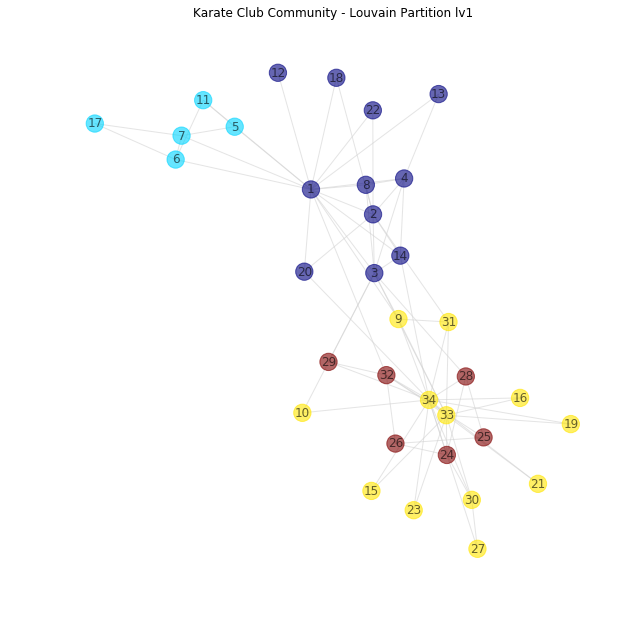

In [10]:
values = [lv1_dict[node] for node in G.nodes()]
pos = nx.spring_layout(G)
plt.figure(figsize=(8,8))
nx.draw(G, 
        pos, 
        cmap = plt.get_cmap('jet'), 
        node_color = values, 
        node_size = 300, 
        alpha = 0.6,
        edge_color = 'lightgray',
        with_labels = True)
plt.title('Karate Club Community - Louvain Partition lv1')
plt.show()

##### Q1 - PART ii
**Your own who-talks-to-whom network (underlying undirected graph where you put an edge if there is a directed link in either direction between two nodes)**

**ANSWER)**             
For the Who Talks to Whom network as well, we use networkx and by building several graph layouts and then use the Louvain Community package.


In [11]:
from pandas import Series, DataFrame
import pandas as pd
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import community
from networkx.algorithms.community import centrality
import itertools
from functools import reduce
import collections
import seaborn as sns 

** Create graph **

In [12]:
avg_mat = pd.read_csv('./HW2_who_talks_to_whom_avg.csv')
node_no_dict = {i:str(i+1) for i in list(range(81))}
avg_node_list = list()
for i in list(range(81)):
    for j in list(range(81)):
        if avg_mat.iloc[i, j] != 0:
            avg_node_list.append([node_no_dict[i], node_no_dict[j], avg_mat.iloc[i, j]])
G = nx.Graph()
G.add_weighted_edges_from(avg_node_list)

Rough idea of the network：

![BAcommunity.png](images/BAcommunity.png)

From the above graph, the whole class seems to split up to two communities with one more “talkative” (upper right group) and one more “silent” (lower left group). The two groups are connected quite tightly by several socially active students (No. 32, 68, 62, …) who are represented by big red dots - they are the ones who has talked to the most number of people (top 10% talkative).

Let us now try to create a dendogram for the partition.

** Find a partition that maximizes modularity **

In [13]:
part = community.best_partition(G)
mod = community.modularity(part, G)
print("modularity: ", mod)

modularity:  0.433408379868


** Partition at certain level **

In [14]:
den = community.generate_dendrogram(G)
for level in range(len(den)):
   print("partition at level", level, " is ", community.partition_at_level(den, level), "\n")
print("The least partition gives 5 communities.")

partition at level 0  is  {'1': 0, '13': 1, '14': 2, '18': 3, '22': 3, '25': 4, '33': 0, '36': 1, '40': 1, '41': 3, '42': 2, '47': 5, '49': 2, '50': 2, '52': 1, '55': 2, '57': 6, '64': 1, '75': 5, '77': 1, '78': 7, '79': 5, '80': 6, '81': 1, '2': 4, '4': 5, '5': 8, '7': 4, '12': 8, '19': 4, '24': 4, '26': 4, '27': 4, '28': 4, '29': 9, '32': 10, '35': 11, '37': 10, '38': 11, '39': 4, '46': 9, '48': 4, '53': 4, '58': 4, '60': 4, '61': 10, '68': 10, '69': 8, '73': 4, '74': 11, '3': 3, '6': 2, '9': 7, '11': 3, '16': 3, '17': 5, '21': 3, '31': 12, '45': 3, '51': 10, '54': 5, '56': 10, '59': 3, '62': 3, '63': 7, '67': 6, '72': 7, '76': 12, '10': 4, '15': 5, '20': 5, '44': 5, '66': 5, '23': 10, '8': 0, '43': 9, '71': 1, '70': 9, '34': 9, '65': 5, '30': 10} 

partition at level 1  is  {'1': 0, '13': 1, '14': 0, '18': 1, '22': 1, '25': 2, '33': 0, '36': 1, '40': 1, '41': 1, '42': 0, '47': 3, '49': 0, '50': 0, '52': 1, '55': 0, '57': 3, '64': 1, '75': 3, '77': 1, '78': 1, '79': 3, '80': 3, '81':

** Plot using networkx where different community households have different colors. **

* Level 0

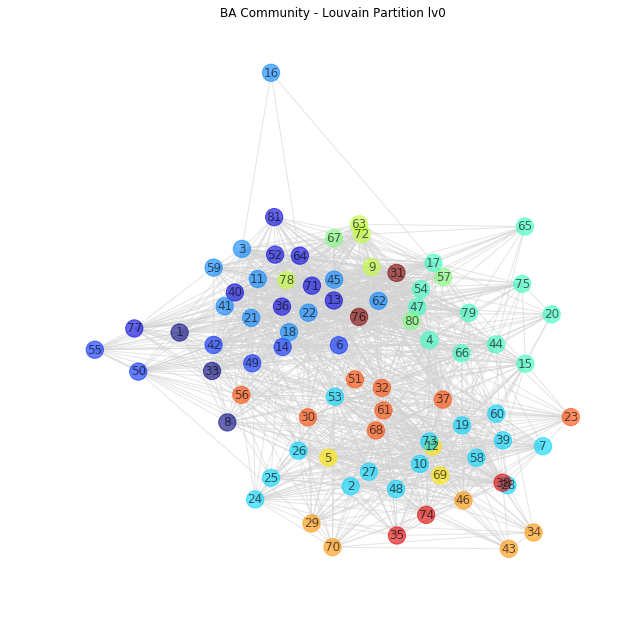

In [15]:
lv0_dict = community.partition_at_level(den, 0)
lv0_part_dict = dict()
plt.figure(figsize=(8, 8))
for i in list(set(lv0_dict.values())):
    lv0_part_dict[i] = list()
    for j in list(lv0_dict.keys()):
        if lv0_dict[j] == i:
            lv0_part_dict[i].append(j)
values = [lv0_dict[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, 
        pos, 
        cmap = plt.get_cmap('jet'), 
        node_color = values, 
        node_size = 300, 
        alpha = 0.6,
        edge_color = 'lightgray',
        with_labels = True)
plt.title('BA Community - Louvain Partition lv0')
plt.show()

In [16]:
for i in list(lv0_part_dict.keys()):
    print("The " + str(int(i)+1) + "th community contains " + str(len(lv0_part_dict[i])) + " nodes: " + str(lv0_part_dict[i]) + ". \n")

The 1th community contains 3 nodes: ['1', '33', '8']. 

The 2th community contains 8 nodes: ['13', '36', '40', '52', '64', '77', '81', '71']. 

The 3th community contains 6 nodes: ['14', '42', '49', '50', '55', '6']. 

The 4th community contains 10 nodes: ['18', '22', '41', '3', '11', '16', '21', '45', '59', '62']. 

The 5th community contains 15 nodes: ['25', '2', '7', '19', '24', '26', '27', '28', '39', '48', '53', '58', '60', '73', '10']. 

The 6th community contains 11 nodes: ['47', '75', '79', '4', '17', '54', '15', '20', '44', '66', '65']. 

The 7th community contains 3 nodes: ['57', '80', '67']. 

The 8th community contains 4 nodes: ['78', '9', '63', '72']. 

The 9th community contains 3 nodes: ['5', '12', '69']. 

The 10th community contains 5 nodes: ['29', '46', '43', '70', '34']. 

The 11th community contains 8 nodes: ['32', '37', '61', '68', '51', '56', '23', '30']. 

The 12th community contains 3 nodes: ['35', '38', '74']. 

The 13th community contains 2 nodes: ['31', '76']

* Level 1

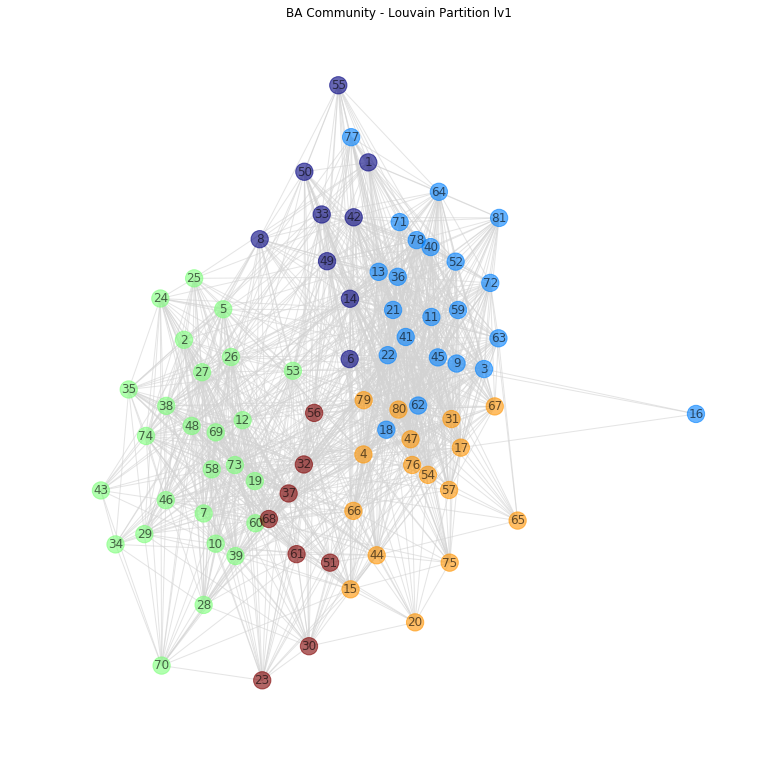

In [17]:
lv1_dict = community.partition_at_level(den, 1)
lv1_part_dict = dict()
plt.figure(figsize=(10, 10))

for i in list(set(lv1_dict.values())):
    lv1_part_dict[i] = list()
    for j in list(lv1_dict.keys()):
        if lv1_dict[j] == i:
            lv1_part_dict[i].append(j)
values = [lv1_dict[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, 
        pos, 
        cmap = plt.get_cmap('jet'), 
        node_color = values, 
        node_size = 300, 
        alpha = 0.6,
        edge_color = 'lightgray',
        with_labels = True)
plt.title('BA Community - Louvain Partition lv1')
plt.show()

In [18]:
for i in list(lv1_part_dict.keys()):
    print("The " + str(int(i)+1) + "th community contains " + str(len(lv1_part_dict[i])) + " nodes: " + str(lv1_part_dict[i]) + ". \n")

The 1th community contains 9 nodes: ['1', '14', '33', '42', '49', '50', '55', '6', '8']. 

The 2th community contains 22 nodes: ['13', '18', '22', '36', '40', '41', '52', '64', '77', '78', '81', '3', '9', '11', '16', '21', '45', '59', '62', '63', '72', '71']. 

The 3th community contains 26 nodes: ['25', '2', '5', '7', '12', '19', '24', '26', '27', '28', '29', '35', '38', '39', '46', '48', '53', '58', '60', '69', '73', '74', '10', '43', '70', '34']. 

The 4th community contains 16 nodes: ['47', '57', '75', '79', '80', '4', '17', '31', '54', '67', '76', '15', '20', '44', '66', '65']. 

The 5th community contains 8 nodes: ['32', '37', '61', '68', '51', '56', '23', '30']. 



It can be easily seen from the above graph that there are two main communities in the class (green and light blue) and some smaller "inbetweener" groups (brown, yellow and dark blue). One factor that causes this split up could be language. For example, students that mainly uses English, Chinese, German and Spanish could easily and naturally group together and communincate more as their cost of communication is much lower. The "inbetweener" could be the ones that are familiar both languages, e.g. Singaporean. More information are needed in order to conduct deeper analysis.

### QUESTION 2   
##### (10 points) 
**From the Bass Model article in Week 5 folder (first, relate it to the model and terminology we did in class) and the data for the DOCTOR movie (Table 8.7), obtain a rolling-horizon estimate of the parameters (using the optimization model described) for a forecast after observing the sales till week 4. Compare them with the estimates and actual observed demand in the article. You are free to use any regression package and language (R, Excel Data Toolpak, Python).**

**ANSWER)**

In [19]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

#Revenues from The Doctor Movie:
t= np.linspace(1.0, 5, num=5) # timeline
revenues=np.array([0, 0.10,3,5.2,7]) # revenues in $ millions of dollars
c_revenues=np.cumsum(revenues) # cumulative revenues in $ millions of dollars

# initial variables(M, P, Q) as estimates (trying several variables)
vars = [34.85, 0.07,0.49]

# Min Squared Error - Bass Model
def Model (vars, t, sales):
    M = vars[0]
    P = vars[1]
    Q = vars[2]
    for i in range (len (c_revenues)):
        Bass= (P+(Q *(c_revenues[i])/M))*(M - c_revenues[i])
    return (Bass - (revenues))
          
# non linear least square fitting
varfinal,success = leastsq(Model, vars, args=(t, revenues))

# Estimation of M, P, Q
m = varfinal[0]
p = varfinal[1]
q = varfinal[2]
print(varfinal)

[ 27.32595273   0.08723368   0.29864641]


The parameters to estimate are the following:								
m = number of people estimated to eventually watch the movie								
q = coefficient of imitation (based on word-of-mouth influences)								
p = coefficient of innovation (based on watching the movie without any influence from others. 								
								
The non-linear optimization model consists of minimizing the squared errors (E_t) in which the error is the difference between the forecaseted and actual number of adopters for a specific time period t. 

We have obtain the following estimates: 
m = 27.3259
p = 0.08723
q = 0.29864

Using Excel to plot this, we get the following results:

![BassModelGraph.png](images/BassModelGraph.png)

### QUESTION 3   
##### (30 points) 
**In this question your task is to recreate the findings from a network diffusion econometrics study on microfinance (there is a matlab version to help you along). (the NBER working paper in the folder has more details, so that may be more useful instead of the Science paper)**

**ANSWER)**                       
The answer to this question is attached as a seperate folder in the submission.
This contains thw following files:                        
                    
1) **REPORT** : the pdf file contains the report that recreates the findings in the study.                    
2) **csv file** file : the "cross_sectional_45_gw.csv" contains .....                    
3) **Python code** : the file "NA_Q3_GroupG.py" is the python code for the solution                    
4) **Regression RMD file** : the file "regression result_GroupG.RMD" contains the regression equations done for obtaining the result                    
5) **Middle csv folder** : this folder contains 2 other files that are used for calculations                    